## EN2550: Assignment 03 on Object Counting on a Conveyor Belt


Index No: 190337X

Name: C. J. Kurukulasuriya

## __Connected Component Analysis__

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

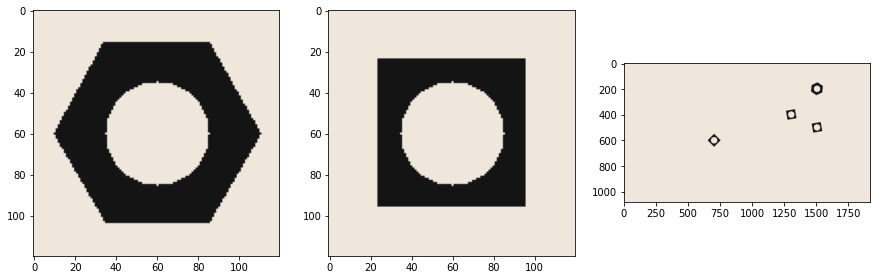

In [2]:

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1, 3, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

1. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

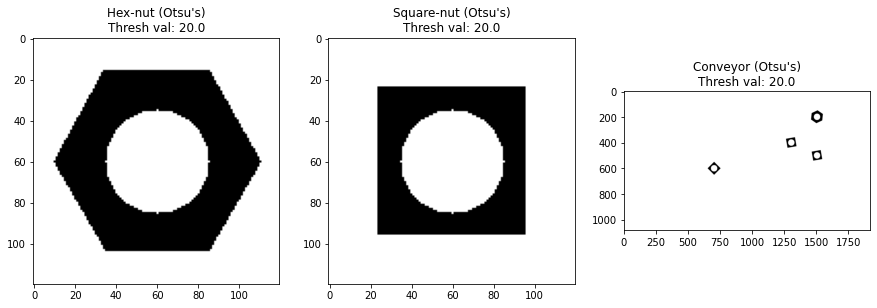

In [3]:
## Your code here. ##
# convert to grayscale
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# apply Otsu's thresholding
hval, hexnut_template_thresh = cv.threshold(
    hexnut_template_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
sval, squarenut_template_thresh = cv.threshold(
    squarenut_template_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
cval, conveyor_f100_thresh = cv.threshold(
    conveyor_f100_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

im = [(hval, hexnut_template_thresh),
      (sval, squarenut_template_thresh), (cval, conveyor_f100_thresh)]
title = ["Hex-nut", "Square-nut", "Conveyor"]
# plot results
fig, ax = plt. subplots(1, 3, figsize=(15, 15))

for i in range(3):
    ax[i].imshow(im[i][1], 'gray')
    ax[i].set_title(title[i] + " (Otsu's)\nThresh val: "+str(im[i][0]))

plt.show()


*__The threshold values of all three images are equal to 20.0__*

1. Carry out morphological closing to remove small holes inside the foreground. Use a 3x3
kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

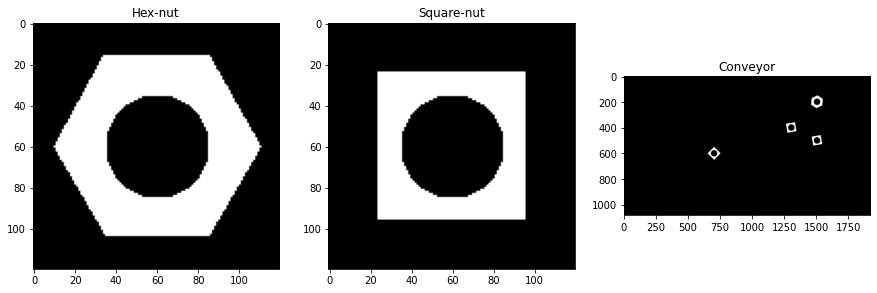

In [4]:
## Your code here. ##
# the foreground should be white for morphology, so invert.
hexnut = cv.bitwise_not(hexnut_template_thresh)
squarenut = cv.bitwise_not(squarenut_template_thresh)
conveyor = cv.bitwise_not(conveyor_f100_thresh)

# carry out morphological closing
kernel = np.ones((3, 3), np.uint8)

hexnut_morph = cv.morphologyEx(hexnut, cv.MORPH_CLOSE, kernel)
squarenut_morph = cv.morphologyEx(squarenut, cv.MORPH_CLOSE, kernel)
conveyor_morph = cv.morphologyEx(conveyor, cv.MORPH_CLOSE, kernel)

# plot results
im = [hexnut_morph, squarenut_morph, conveyor_morph]
title = ["Hex-nut", "Square-nut", "Conveyor"]

fig, ax = plt. subplots(1, 3, figsize=(15, 15))

for i in range(3):
    ax[i].imshow(im[i], 'gray')
    ax[i].set_title(title[i])

plt.show()


1. *Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as color mapped images. 
Answer the following questions*

* How many connected components are detected in each image?

* What are the statistics? Interpret these statistics.

* What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.

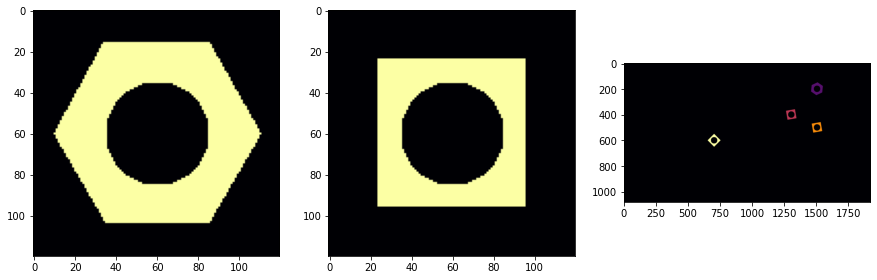

In [5]:
hex_n, hex_labels, hex_stats, hex_centroids=cv.connectedComponentsWithStats(hexnut_morph)
sqr_n, sqr_labels, sqr_stats, sqr_centroids=cv.connectedComponentsWithStats(squarenut_morph)
cnv_n, cnv_labels, cnv_stats, cnv_centroids=cv.connectedComponentsWithStats(conveyor_morph)

labels = [hex_labels, sqr_labels, cnv_labels]
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

for i in range(3):
    labels[i] = cv.normalize(labels[i], None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    labels[i] = cv.applyColorMap(labels[i], cv.COLORMAP_INFERNO)
    ax[i].imshow(cv.cvtColor(labels[i], cv.COLOR_BGR2RGB))

plt.show()


In [6]:
print("Number of connected components detected (without the background)")
print("Hexnut image\t :",hex_n-1)
print("Squarenut image\t :",sqr_n-1)
print("Conveyor image\t :",cnv_n-1)

Number of connected components detected (without the background)
Hexnut image	 : 1
Squarenut image	 : 1
Conveyor image	 : 4


In [7]:
def tablePrint(title, n, im_stats):
    stats = ['CC_STAT_LEFT', 'CC_STAT_TOP', 'CC_STAT_WIDTH', 'CC_STAT_HEIGHT', 'CC_STAT_AREA']
    format_row = "{:<15}" * (n + 1)
    print(format_row.format(title, *["component " + str(k) for k in range(n)]))
    im_stats = np.transpose(im_stats, (1,0))
    for i in range(len(stats)):
        print(format_row.format(stats[i], *im_stats[i]))
    print()

print("Statistics of images:\n ")
tablePrint('Hexnut', hex_n, hex_stats)
tablePrint('Squarenut', sqr_n, sqr_stats)
tablePrint('Conveyor', cnv_n, cnv_stats)


Statistics of images:
 
Hexnut         component 0    component 1    
CC_STAT_LEFT   0              10             
CC_STAT_TOP    0              16             
CC_STAT_WIDTH  120            101            
CC_STAT_HEIGHT 120            88             
CC_STAT_AREA   9672           4728           

Squarenut      component 0    component 1    
CC_STAT_LEFT   0              24             
CC_STAT_TOP    0              24             
CC_STAT_WIDTH  120            72             
CC_STAT_HEIGHT 120            72             
CC_STAT_AREA   11173          3227           

Conveyor       component 0    component 1    component 2    component 3    component 4    
CC_STAT_LEFT   0              1454           1259           1459           650            
CC_STAT_TOP    0              150            359            459            550            
CC_STAT_WIDTH  1920           92             82             82             101            
CC_STAT_HEIGHT 1080           100            82           

Interpretation of the above statistics:

a. *CC_STAT_LEFT*: The leftmost (x) coordinate of the bounding box in the horizontal direction.

b. *CC_STAT_TOP*: The topmost (y) coordinate of the bounding box in the vertical direction.

c. *CC_STAT_WIDTH*: The width of the bounding box.

d. *CC_STAT_HEIGHT*: The height size of the bounding box.

e. *CC_STAT_AREA*: The total area of the connected component (in pixels).

Centroids of each connected component found in each image:

In [8]:
print('Hexnut CC Centroids:')
for i in range(hex_n):
    print('Component', i, ':', *map(lambda x: round(x, 3), hex_centroids[i]))

print('\nSquarenut CC Centroids:')
for i in range(sqr_n):
    print('Component', i, ':', *map(lambda x: round(x, 3), sqr_centroids[i]))

print('\nConveyor CC Centroids:')
for i in range(cnv_n):
    print('Component', i, ':', *map(lambda x: round(x, 3), cnv_centroids[i]))


Hexnut CC Centroids:
Component 0 : 59.337 59.635
Component 1 : 59.834 59.224

Squarenut CC Centroids:
Component 0 : 59.588 59.588
Component 1 : 59.197 59.197

Conveyor CC Centroids:
Component 0 : 957.363 540.444
Component 1 : 1499.242 199.285
Component 2 : 1299.183 399.183
Component 3 : 1499.183 499.183
Component 4 : 700.0 600.0


1. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

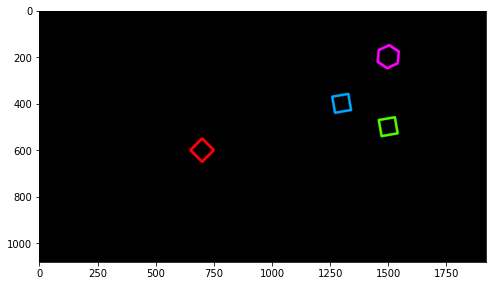

In [9]:
contours, hierarchy = cv.findContours(conveyor_morph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
a,b = conveyor_morph.shape
dst = np.zeros((a, b, 3), dtype=np.uint8)

for i in range(len(contours)):
    dst = cv.drawContours(dst, contours, i, (50*i,255,255), 10)

plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(dst, cv.COLOR_HSV2RGB))
plt.show()


## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.
1. Open the sequence and play it using the code below.

In [11]:
cv.namedWindow('Conveyor',cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(2) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

1. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in the template.

In [12]:
def findMatches(img1, img2):
    img1_contours, _ = cv.findContours(img1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    img2_contours, _ = cv.findContours(img2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    total = 0
    for c in img1_contours:
        match = cv.matchShapes(c, img2_contours[0], 1, 0)
        if match < 0.005:
            total += 1

    print("Number of matching hexagonal nuts:", total)

findMatches(conveyor_morph, hexnut_morph)


Number of matching hexagonal nuts: 1


1. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [13]:
## Your code here. ##
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame_array = []

kernel = np.ones((3, 3), np.uint8)

hex_total = 0
sqr_total = 0
left_ref  = 0

hex_contours, _ = cv.findContours(hexnut_morph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
sqr_contours, _ = cv.findContours(squarenut_morph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

while cap.isOpened():                                    
    ret, frame_bgr = cap.read()
    if not ret:  
        print("Can't receive frame (stream end?). Exiting.")
        break

    frame = cv.cvtColor(frame_bgr,cv.COLOR_BGR2GRAY)       
    frame = cv.bitwise_not(cv.threshold(frame,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)[1])
    frame = cv.morphologyEx(frame, cv.MORPH_CLOSE, kernel)    
    contours, _ = cv.findContours(frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    hex_frame_total=0
    sqr_frame_total=0

    
    left_max=0
    
    for c in contours:        
        if cv.matchShapes(c,sqr_contours[0],1,0)<0.002:
            sqr_frame_total+=1
            left=np.min(c[:,:,0])
            if left>left_ref: sqr_total+=1
            if left>left_max: left_max=left
            frame_bgr= cv.drawContours(frame_bgr,[c],0,(255, 150, 0),8)            

        elif cv.matchShapes(c,hex_contours[0],1,0)<0.002:
            hex_frame_total+=1
            left=np.min(c[:,:,0])
            if left>left_ref: hex_total+=1
            if left>left_max: left_max=left
            frame_bgr= cv.drawContours(frame_bgr,[c],0,(150, 0, 255),8)            
    
    left_ref=left_max

    total_nuts_frame = hex_frame_total + sqr_frame_total
    total_nuts = hex_total + sqr_total

    f += 1
    text1 = 'Frame: ' + str(f) 
    text2 = '                Current     Total'
    text3 = 'Hexnuts         '+str(hex_frame_total)+'            '+str(hex_total)
    text4 = 'Squarenuts     '+str(sqr_frame_total)+'            '+str(sqr_total)
    text5 = 'Total            '+str(total_nuts_frame)+'            '+str(total_nuts)

    cv.putText(frame_bgr,text1 , (100, 90), cv.FONT_HERSHEY_SIMPLEX,  1, (0,0,0), 1, cv.LINE_AA) 
    cv.putText(frame_bgr,text2 , (100, 150), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv.LINE_AA)    
    cv.putText(frame_bgr,text3 , (100, 200), cv.FONT_HERSHEY_SIMPLEX, 1, (150, 0, 255), 1, cv.LINE_AA)
    cv.putText(frame_bgr,text4 , (100, 250), cv.FONT_HERSHEY_SIMPLEX,1, (255, 150, 0), 1, cv.LINE_AA)
    cv.putText(frame_bgr,text5 , (100, 310), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
        
    cv.imshow('Conveyor', frame_bgr)
    frame_array.append(frame_bgr)

    if cv.waitKey(2) == ord('q'):  
        break

cap.release()

shape = (1080, 1920, 3)
out = cv.VideoWriter('./conveyor_result_190337X.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
